In [1]:
#Imports 

from __future__ import division, print_function, absolute_import

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
learning_rate = 0.001
num_steps = 2000
batch_size = 128 

num_input = 784
num_classes = 10 
drop_out = 0.25 

In [15]:
def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):

        x = x_dict['images']
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

 
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 64 filters and a kernel size of 3
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in tf contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)

    return out

In [19]:
def model_fn(features, labels, mode):
    

    logits_train = conv_net(features, num_classes, drop_out, reuse=False, is_training=True)
    logits_test = conv_net(features, num_classes, drop_out, reuse=True, is_training=False)
    
    # Predictions
    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)
    
    # If prediction mode, early return
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes) 
        
    # Define loss and optimizer
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    # Evaluate the accuracy of the model
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    

    estim_specs = tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=pred_classes,
      loss=loss_op,
      train_op=train_op,
      eval_metric_ops={'accuracy': acc_op})

    return estim_specs

In [20]:
model = tf.estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


INFO:tensorflow:Using config: {'_model_dir': '/var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [21]:
input_fn = tf.estimator.inputs.numpy_input_fn(x = {'images': mnist.train.images}, y = mnist.train.labels, 
                                             batch_size=batch_size, num_epochs = None, shuffle = True)
model.train(input_fn, steps=num_steps)

INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1 into /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt.


INFO:tensorflow:loss = 2.32674, step = 1


INFO:tensorflow:loss = 2.32674, step = 1


INFO:tensorflow:global_step/sec: 7.06049


INFO:tensorflow:global_step/sec: 7.06049


INFO:tensorflow:loss = 0.0652994, step = 101 (14.165 sec)


INFO:tensorflow:loss = 0.0652994, step = 101 (14.165 sec)


INFO:tensorflow:global_step/sec: 7.65798


INFO:tensorflow:global_step/sec: 7.65798


INFO:tensorflow:loss = 0.0673468, step = 201 (13.058 sec)


INFO:tensorflow:loss = 0.0673468, step = 201 (13.058 sec)


INFO:tensorflow:global_step/sec: 7.22444


INFO:tensorflow:global_step/sec: 7.22444


INFO:tensorflow:loss = 0.0856817, step = 301 (13.842 sec)


INFO:tensorflow:loss = 0.0856817, step = 301 (13.842 sec)


INFO:tensorflow:global_step/sec: 7.09467


INFO:tensorflow:global_step/sec: 7.09467


INFO:tensorflow:loss = 0.0509708, step = 401 (14.094 sec)


INFO:tensorflow:loss = 0.0509708, step = 401 (14.094 sec)


INFO:tensorflow:global_step/sec: 7.56687


INFO:tensorflow:global_step/sec: 7.56687


INFO:tensorflow:loss = 0.0928859, step = 501 (13.215 sec)


INFO:tensorflow:loss = 0.0928859, step = 501 (13.215 sec)


INFO:tensorflow:global_step/sec: 7.61497


INFO:tensorflow:global_step/sec: 7.61497


INFO:tensorflow:loss = 0.0250449, step = 601 (13.132 sec)


INFO:tensorflow:loss = 0.0250449, step = 601 (13.132 sec)


INFO:tensorflow:global_step/sec: 7.591


INFO:tensorflow:global_step/sec: 7.591


INFO:tensorflow:loss = 0.0319979, step = 701 (13.174 sec)


INFO:tensorflow:loss = 0.0319979, step = 701 (13.174 sec)


INFO:tensorflow:global_step/sec: 7.61565


INFO:tensorflow:global_step/sec: 7.61565


INFO:tensorflow:loss = 0.0185049, step = 801 (13.131 sec)


INFO:tensorflow:loss = 0.0185049, step = 801 (13.131 sec)


INFO:tensorflow:global_step/sec: 7.6255


INFO:tensorflow:global_step/sec: 7.6255


INFO:tensorflow:loss = 0.00704593, step = 901 (13.116 sec)


INFO:tensorflow:loss = 0.00704593, step = 901 (13.116 sec)


INFO:tensorflow:global_step/sec: 7.65877


INFO:tensorflow:global_step/sec: 7.65877


INFO:tensorflow:loss = 0.0194138, step = 1001 (13.055 sec)


INFO:tensorflow:loss = 0.0194138, step = 1001 (13.055 sec)


INFO:tensorflow:global_step/sec: 7.65161


INFO:tensorflow:global_step/sec: 7.65161


INFO:tensorflow:loss = 0.027941, step = 1101 (13.069 sec)


INFO:tensorflow:loss = 0.027941, step = 1101 (13.069 sec)


INFO:tensorflow:global_step/sec: 7.62236


INFO:tensorflow:global_step/sec: 7.62236


INFO:tensorflow:loss = 0.031002, step = 1201 (13.120 sec)


INFO:tensorflow:loss = 0.031002, step = 1201 (13.120 sec)


INFO:tensorflow:global_step/sec: 7.65826


INFO:tensorflow:global_step/sec: 7.65826


INFO:tensorflow:loss = 0.0293795, step = 1301 (13.058 sec)


INFO:tensorflow:loss = 0.0293795, step = 1301 (13.058 sec)


INFO:tensorflow:global_step/sec: 7.61807


INFO:tensorflow:global_step/sec: 7.61807


INFO:tensorflow:loss = 0.0263106, step = 1401 (13.127 sec)


INFO:tensorflow:loss = 0.0263106, step = 1401 (13.127 sec)


INFO:tensorflow:global_step/sec: 7.64471


INFO:tensorflow:global_step/sec: 7.64471


INFO:tensorflow:loss = 0.0101968, step = 1501 (13.081 sec)


INFO:tensorflow:loss = 0.0101968, step = 1501 (13.081 sec)


INFO:tensorflow:global_step/sec: 7.63717


INFO:tensorflow:global_step/sec: 7.63717


INFO:tensorflow:loss = 0.0241922, step = 1601 (13.094 sec)


INFO:tensorflow:loss = 0.0241922, step = 1601 (13.094 sec)


INFO:tensorflow:global_step/sec: 7.61294


INFO:tensorflow:global_step/sec: 7.61294


INFO:tensorflow:loss = 0.00863722, step = 1701 (13.136 sec)


INFO:tensorflow:loss = 0.00863722, step = 1701 (13.136 sec)


INFO:tensorflow:global_step/sec: 7.49052


INFO:tensorflow:global_step/sec: 7.49052


INFO:tensorflow:loss = 0.00497118, step = 1801 (13.350 sec)


INFO:tensorflow:loss = 0.00497118, step = 1801 (13.350 sec)


INFO:tensorflow:global_step/sec: 7.68663


INFO:tensorflow:global_step/sec: 7.68663


INFO:tensorflow:loss = 0.0625385, step = 1901 (13.012 sec)


INFO:tensorflow:loss = 0.0625385, step = 1901 (13.012 sec)


INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2000 into /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt.


INFO:tensorflow:Loss for final step: 0.0489931.


INFO:tensorflow:Loss for final step: 0.0489931.


In [22]:
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)

In [23]:
model.evaluate(input_fn)

INFO:tensorflow:Starting evaluation at 2018-02-03-18:45:21


INFO:tensorflow:Starting evaluation at 2018-02-03-18:45:21


INFO:tensorflow:Restoring parameters from /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt-2000


INFO:tensorflow:Restoring parameters from /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt-2000


INFO:tensorflow:Finished evaluation at 2018-02-03-18:45:25


INFO:tensorflow:Finished evaluation at 2018-02-03-18:45:25


INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.989, global_step = 2000, loss = 0.0377628


INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.989, global_step = 2000, loss = 0.0377628


{'accuracy': 0.98900002, 'global_step': 2000, 'loss': 0.03776281}

INFO:tensorflow:Restoring parameters from /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt-2000


INFO:tensorflow:Restoring parameters from /var/folders/g6/7_c7p81525gcnw_3qlcv5j2w0000gn/T/tmp99c6gd76/model.ckpt-2000


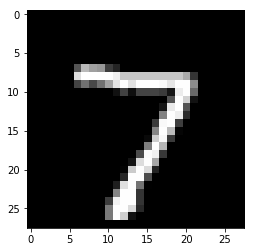

Model prediction: 7


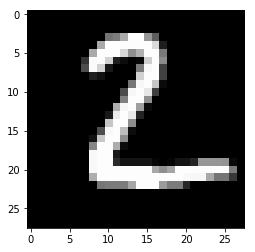

Model prediction: 2


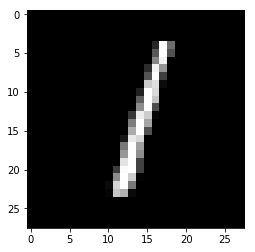

Model prediction: 1


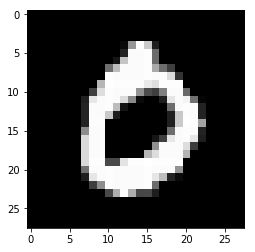

Model prediction: 0


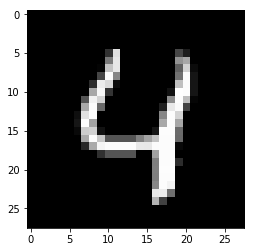

Model prediction: 4


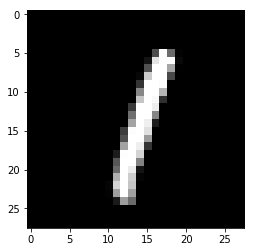

Model prediction: 1


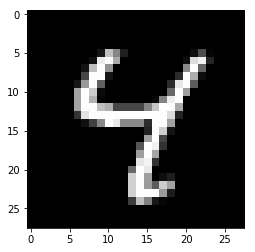

Model prediction: 4


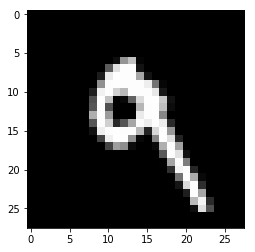

Model prediction: 9


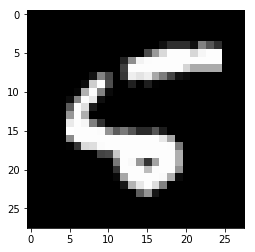

Model prediction: 5


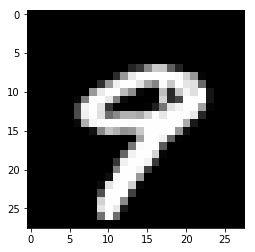

Model prediction: 9


In [26]:
n_images = 10

test_images = mnist.test.images[:n_images]

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': test_images}, shuffle=False)

preds = list(model.predict(input_fn))

# Display
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])